In [ ]:
import os

os.environ["SD_WEBUI_ARGV"] = '["--xformers"]'


In [53]:
from modules import initialize
from modules import script_callbacks

In [ ]:
initialize.imports()
initialize.initialize()

In [54]:
script_callbacks.before_ui_callback()

2024-01-15 12:14:15,532 - AnimateDiff - INFO - Injecting LCM to UI.


In [ ]:
from modules.img2img import img2img
from modules.processing import StableDiffusionProcessingImg2Img

In [ ]:
from modules import shared
from modules.shared import opts, state
from modules.processing import create_binary_mask, process_images
from PIL import Image

In [81]:
image = Image.open("test-image.png")
mask = Image.open("test-mask.png")
mask = create_binary_mask(mask)

scale_by = None
if scale_by is not None:
    width = int(image.width * scale_by)
    height = int(image.height * scale_by)
    
prompt = "wearing a necklace of BVL<lora:necklace-BVL-000012:1.2>"
negative_prompt = "(worst quality, low quality, normal quality, lowres, low details, oversaturated, undersaturated, overexposed, underexposed, grayscale, bw, bad photo, bad photography, bad art:1.4), (watermark, signature, text font, username, error, logo, words, letters, digits, autograph, trademark, name:1.2), (blur, blurry, grainy), morbid, ugly, asymmetrical, mutated malformed, mutilated, poorly lit, bad shadow, draft, cropped, out of frame, cut off, censored, jpeg artifacts, out of focus, glitch, duplicate, (airbrushed, cartoon, anime, semi-realistic, cgi, render, blender, digital art, manga, amateur:1.3), (3D ,3D Game, 3D Game Scene, 3D Character:1.1), (bad hands, bad anatomy, bad body, bad face, bad teeth, bad arms, bad legs, deformities:1.3)"

kwargs = {
    "prompt": prompt,
    "negative_prompt": negative_prompt,
    "sampler_name": "DPM++ 2M SDE Karras",
    "batch_size": 1,
    "n_iter": 1,
    "steps": 30,
    "cfg_scale": 5.5,
    "width": 1024,
    "height": 1024,
    "mask_blur": 4,
    "inpainting_method": "Finetuned",
    "inpainting_fill": 1,
    "resize_mode": 1,
    "denoising_strength": 0.75,
    "image_cfg_scale": 1.5,
    "inpaint_full_res": 1,
    "inpaint_full_res_padding": 32,
    "inpainting_mask_invert": 0,
}

assert (
    0.0 <= kwargs["denoising_strength"] <= 1.0
), "can only work with strength in [0.0, 1.0]"


p = StableDiffusionProcessingImg2Img(
    sd_model=shared.sd_model,
    outpath_samples=opts.outdir_samples or opts.outdir_img2img_samples,
    outpath_grids=opts.outdir_grids or opts.outdir_img2img_grids,
    init_images=[image],
    mask=mask,
    override_settings={},
    **kwargs
)

if mask:
    p.extra_generation_params["Mask blur"] = kwargs["mask_blur"]
    

In [82]:
processed = process_images(p)

  0%|          | 0/23 [00:00<?, ?it/s]

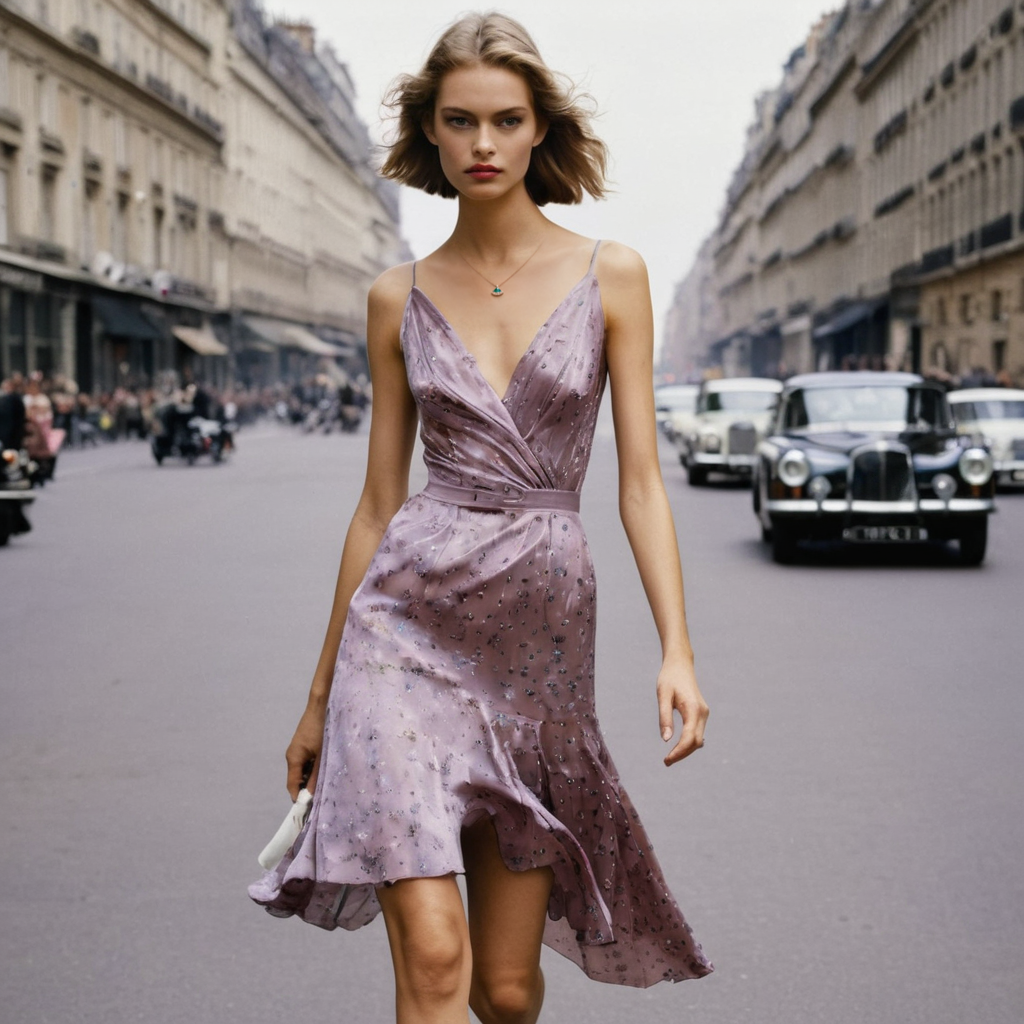

In [83]:
processed.images[0]